In [ ]:
#Installing required packages
!pip install dataprep
!pip install autoviz
!python -m pip uninstall matplotlib --y
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 2.3 MB/s 
     |████████████████████████████████| 78 kB 8.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.0 MB 55.1 MB/s 
     |████████████████████████████████| 749 kB 67.8 MB/s 
     |████████████████████████████████| 28.5 MB 1.6 MB/s 
     |████████████████████████████████| 101 kB 14.9 MB/s 
     |████████████████████████████████| 965 kB 62.6 MB/s 
     |████████████████████████████████| 943 kB 59.8 MB/s 
     |████████████████████████████████| 50 kB 7.4 MB/s 
     |████████████████████████████████| 133 kB 57.5 MB/s 
     |████████████████████████████████| 96 kB 6.9 MB/s 
     |████████████████████████████████| 232 kB 59.2 MB/s 
     |████████████████████████████████| 1.6 MB 48.7 MB/s 
     |██████████████████████

Found existing installation: matplotlib 3.5.3
Uninstalling matplotlib-3.5.3:
  Successfully uninstalled matplotlib-3.5.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 5.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autoviz 0.1.43 requires matplotlib>=3.3.3, but you have matplotlib 3.1.3 which is incompatible.


In [ ]:
#loading required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from datetime import datetime
import io
%matplotlib notebook
%matplotlib inline
import matplotlib.font_manager as fm
from matplotlib import figure
from matplotlib.ticker import FuncFormatter
import matplotlib.patches as mpatches
import matplotlib.figure
from math import sqrt, floor
import numpy as np

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import plotly
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode

import seaborn as sns

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

from scipy import stats
from scipy.stats import norm, skew 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
# clustering algorithms
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
# from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_samples, silhouette_score

# dump the packages 
import pickle 
import re 
from sklearn import preprocessing, metrics, cluster
#eda
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
from dataprep.datasets import load_dataset
from dataprep.eda import create_report

# from google.colab import files
# uploaded = files.upload()

import warnings
warnings.filterwarnings('ignore')
from pathlib import Path
#mount google drive 
from google.colab import drive
drive.mount('/content/drive')

import warnings

def action_with_warnings():
    warnings.warn("should not appear")

with warnings.catch_warnings(record=True):
    action_with_warnings()

%matplotlib notebook

%matplotlib inline

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Reading dataset 
cust_data = pd.read_csv('/content/drive/MyDrive/Projects/Data Analytics/CRM Analytics/Year 2009-2010.csv',encoding= 'unicode_escape')
# cust_data['CustomerID'] = (cust_data['CustomerID']).astype(str)
cust_data.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom


Column Definition



*  	InvoiceNo	- Invoice number
*   StockCode	- Stock code
*   Description	-Description of the product
*   Quantity - Quantity of the product
*   InvoiceDate	- Invoice date 
*   UnitPrice	- Unit price of the product
*   CustomerID - Customer identity


In [ ]:
#Column data types and checking for null values
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


Based on the above result Online Retail dataset found that customer-id has null values


##Data Cleaning

In [ ]:
#Checking null values in each attribute
cust_data.isnull().sum().sort_values(ascending=False)

Customer ID    107927
Description      2928
Invoice             0
StockCode           0
Quantity            0
InvoiceDate         0
Price               0
Country             0
dtype: int64

In [ ]:
#Statistics for Quantity, UnitPrice, CustomerID
cust_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,525461.0,10.337667,107.424110,-9600.00,1.00,3.0,10.00,19152.00
Price,525461.0,4.688834,146.126914,-53594.36,1.25,2.1,4.21,25111.09
Customer ID,417534.0,15360.645478,1680.811316,12346.00,13983.00,15311.0,16799.00,18287.00


In [ ]:
#Converting column names to lowercase
cust_data.columns = cust_data.columns.str.lower()

#renaming column
cust_data.rename(columns={'customer id':'customerid','invoice':'invoiceno','price':'unitprice'}, inplace=True)

In [ ]:
#checking for duplicate rows
print('Number of row before removing duplicates',len(cust_data))
cust_data.drop_duplicates()
print('Number of row after removing duplicates',len(cust_data))

Number of row before removing duplicates 525461
Number of row after removing duplicates 525461


In [ ]:
print('No of rows in the Online Retail dataset before removing null values is',len(cust_data))
# Removing missing rows
cust_data.dropna(inplace=True)
print('No of rows in the Online Retail dataset after removing null values is',len(cust_data))


No of rows in the Online Retail dataset before removing null values is 525461
No of rows in the Online Retail dataset after removing null values is 417534


In [ ]:
#filtering records which has atleast 1 quantity of sales
cust_data = cust_data[cust_data.quantity>0]

In [ ]:
cust_data['invoicedate'] = pd.to_datetime(cust_data['invoicedate'])
print(cust_data)

       invoiceno stockcode                          description  quantity  \
0         489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1         489434    79323P                   PINK CHERRY LIGHTS        12   
2         489434    79323W                  WHITE CHERRY LIGHTS        12   
3         489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4         489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...          ...       ...                                  ...       ...   
525456    538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457    538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458    538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459    538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460    538171     21931               JUMBO STORAGE BAG SUKI         2   

               invoicedate  unitprice  customerid         country  
0      

In [ ]:
# adding additional columns
cust_data['total_amount'] = cust_data['quantity'] * cust_data['unitprice']
# cust_data["invoicedate"].dt.tz_convert(timezone_for_plot)
cust_data['year'] = cust_data['invoicedate'].dt.year
cust_data['month'] = cust_data['invoicedate'].dt.month

##EDA

In [ ]:
#finding total number of unique country,product,customers,transactions
pd.DataFrame([{'Country':cust_data.country.nunique(),'Products':cust_data.stockcode.nunique(),'Customers':cust_data.customerid.nunique(),'Transactions':cust_data.invoiceno.nunique()}], index = ['Total'])

,Country,Products,Customers,Transactions
Total,37,4017,4314,19215


In [ ]:
#finding unique records in each attribute
cust_data.nunique()

invoiceno       19215
stockcode        4017
description      4444
quantity          343
invoicedate     18010
unitprice         449
customerid       4314
country            37
total_amount     2530
year                2
month              12
dtype: int64

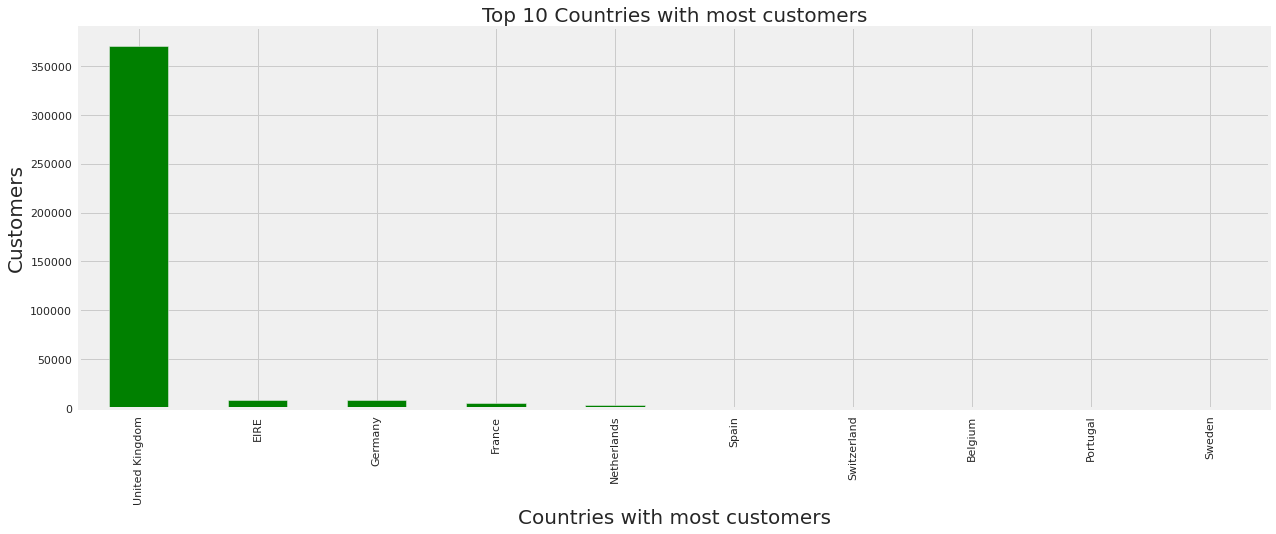

In [ ]:
#Top 10 countries with most number of customers

cust_data.country.value_counts()[:10].plot.bar(figsize = (19, 7), color = ('green'))
plt.title('Top 10 Countries with most customers', fontsize = 20)
plt.xlabel('Countries with most customers', fontsize = 20)
plt.ylabel('Customers', fontsize = 20)
plt.show()

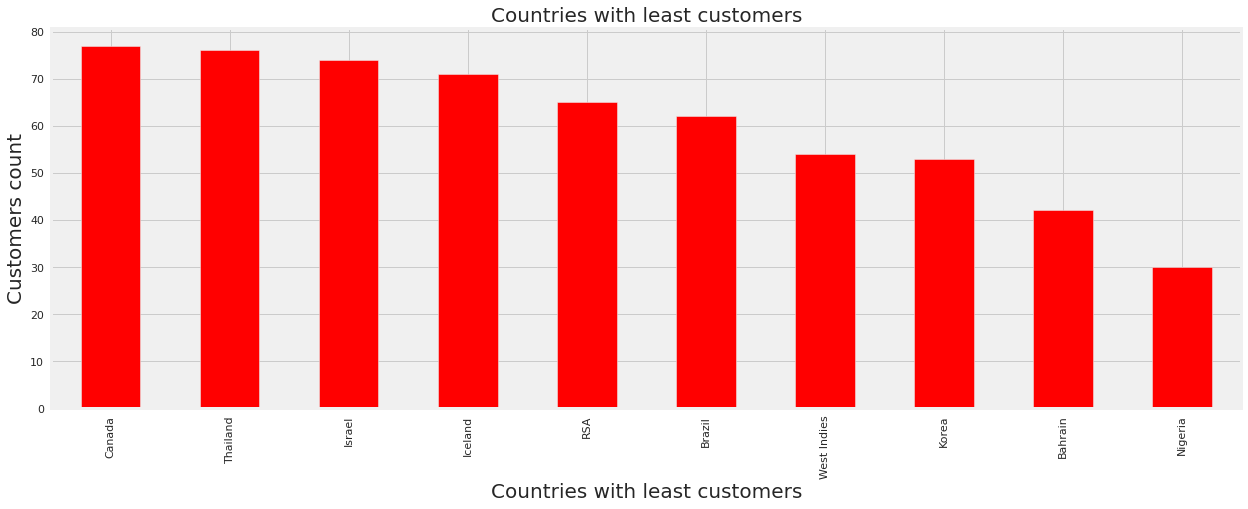

In [ ]:
#Top 10 Countries with less number of customers
 
cust_data.country.value_counts()[-10:].plot.bar(figsize = (19, 7), color = ('red'))
plt.title('Countries with least customers', fontsize = 20)
plt.xlabel('Countries with least customers', fontsize = 20)
plt.ylabel('Customers count', fontsize = 20)
plt.show()

country
United Kingdom          4449351
Denmark                  229690
Netherlands              183680
EIRE                     181428
France                   162202
Germany                  108740
Sweden                    52429
Spain                     22856
Switzerland               22255
Australia                 20189
Belgium                   12075
Channel Islands           11991
Portugal                  11989
Norway                     7867
Italy                      7389
Japan                      7311
Austria                    6697
Greece                     6167
United Arab Emirates       4857
Cyprus                     4625
Finland                    3671
Unspecified                3328
USA                        2806
Thailand                   2552
Lithuania                  2306
Poland                     2144
Singapore                  1753
Malta                      1549
Israel                     1132
Canada                      894
Iceland                     828


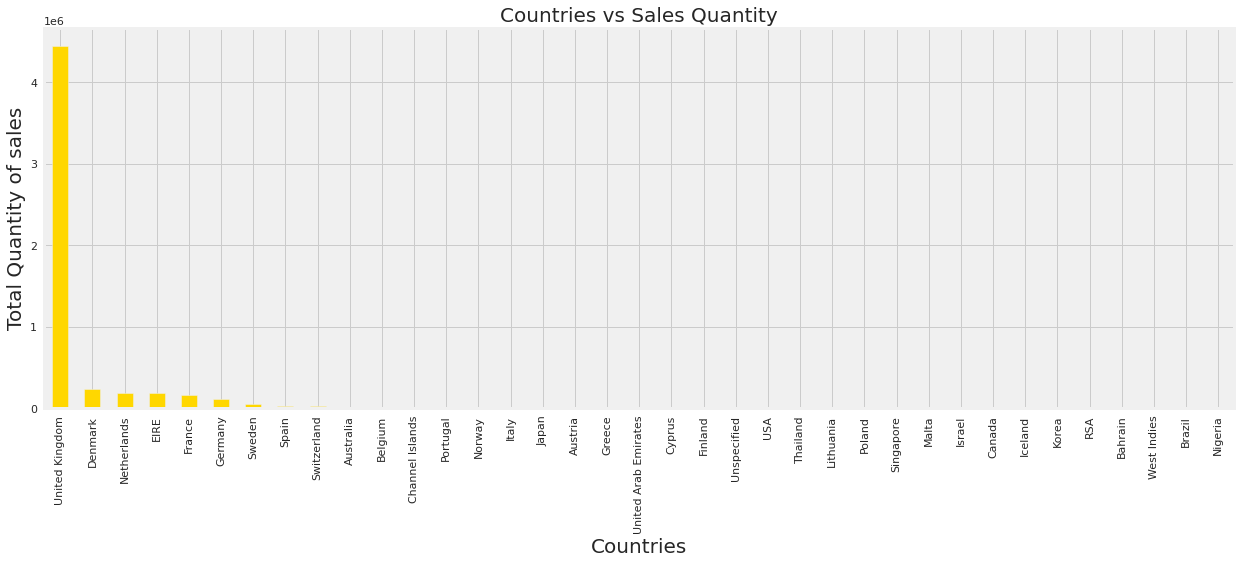

In [ ]:
#Sorting countries based on quantity of sales
print(cust_data.groupby('country')['quantity'].sum().sort_values(ascending=False))
cust_data.groupby('country')['quantity'].sum().sort_values(ascending=False).plot.bar(figsize = (19, 7), color = ('gold'))
plt.title('Countries vs Sales Quantity', fontsize = 20)
plt.xlabel('Countries', fontsize = 20)
plt.ylabel('Total Quantity of sales', fontsize = 20)
plt.show()

In [ ]:
#finding total sales for month and each year 
sales_record = cust_data.groupby(['year','month']).sum()
sales_record = sales_record.sort_values('total_amount',ascending=False)
sales_record 

quantity   unitprice   customerid  total_amount
year month                                                 
2010 11       656324  182645.462  933419612.0   1172336.042
     10       598588  161476.400  758330298.0   1036680.000
     9        569265  116536.811  529978366.0    831615.001
     3        503467  125453.741  497363626.0    699608.991
2009 12       400201   98310.490  476171361.0    686654.160
2010 6        391682  101125.050  479847862.0    639066.580
     8        453590   82668.910  406979593.0    604242.650
     5        386297   91810.500  438489795.0    599985.790
     4        352042   87965.712  416617120.0    594609.192
     7        325661   90292.920  414754757.0    591636.740
     1        370967   84958.372  332326232.0    557319.062
     2        372771   74726.446  355152439.0    506371.066
     12       158369   45052.970  226231221.0    311878.000

In [ ]:
# Top 10 customers based on purchase history 
customers = cust_data.groupby(['customerid']).sum()
customers.sort_values('total_amount',ascending=False,inplace=True)
customers = customers[(customers['quantity'] > 0) & (customers['total_amount'] > 0)]
customers.drop(['year','month'],axis=1,inplace=True)
customers.head(10)

,quantity,unitprice,total_amount
customerid,,,
18102.0,124216,2189.44,349164.35
14646.0,170342,4259.99,248396.50
14156.0,108107,18695.87,196566.74
14911.0,69722,31567.34,152147.57
13694.0,125893,1648.43,131443.19
17511.0,55107,2372.13,84541.17
15061.0,51791,1305.22,83284.38
16684.0,54555,1175.27,80489.21
16754.0,63551,235.47,65500.07


In [ ]:
print('Maximum amount spent by the customer',(customers['total_amount'].argmax()),customers['total_amount'].max())
print('Minimum amount spent by the customer',(customers['total_amount'].argmin()),customers['total_amount'].min())

Maximum amount spent by the customer 0 349164.35
Minimum amount spent by the customer 4311 2.95


In [ ]:
#Top 10 customers based on amount spent
top_customers = customers.head(10)
top_customers.drop(['quantity','unitprice'],axis=1,inplace=True)
top_customers

,total_amount
customerid,
18102.0,349164.35
14646.0,248396.50
14156.0,196566.74
14911.0,152147.57
13694.0,131443.19
17511.0,84541.17
15061.0,83284.38
16684.0,80489.21
16754.0,65500.07


In [ ]:
#Top 10 Customers with least spent
top_customers = customers.tail(10)
top_customers.drop(['quantity','unitprice'],axis=1,inplace=True)
top_customers

,total_amount
customerid,
12846.0,15.58
14580.0,14.85
14900.0,13.92
17040.0,13.52
17378.0,10.95
18115.0,9.70
15040.0,7.49
15913.0,6.30
13788.0,3.75


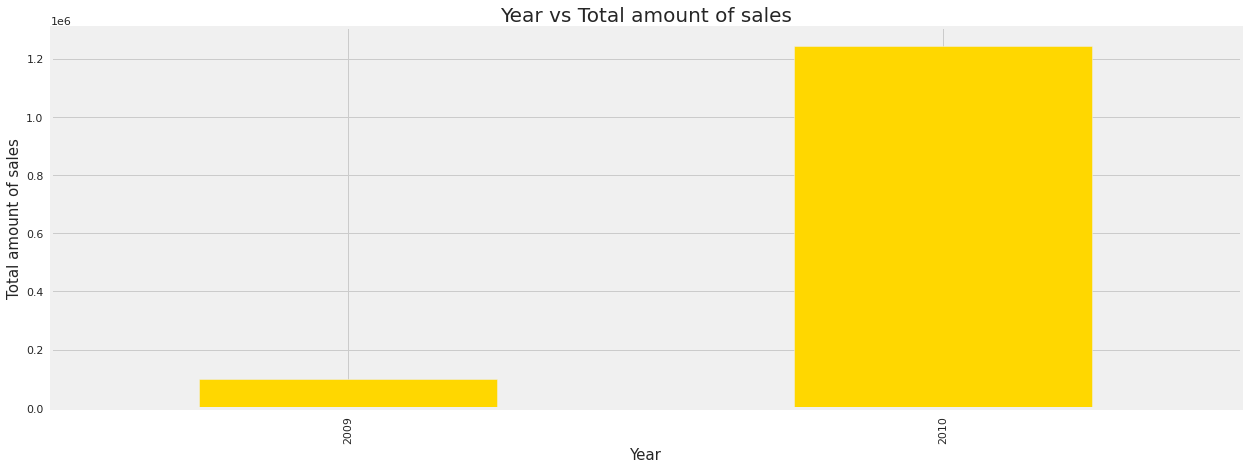

In [ ]:
#Total amount of sales in each year
cust_data.groupby('year')['unitprice'].sum().plot.bar(figsize = (19, 7), color = ('gold'))
plt.title('Year vs Total amount of sales', fontsize = 20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Total amount of sales', fontsize = 15)
plt.show()

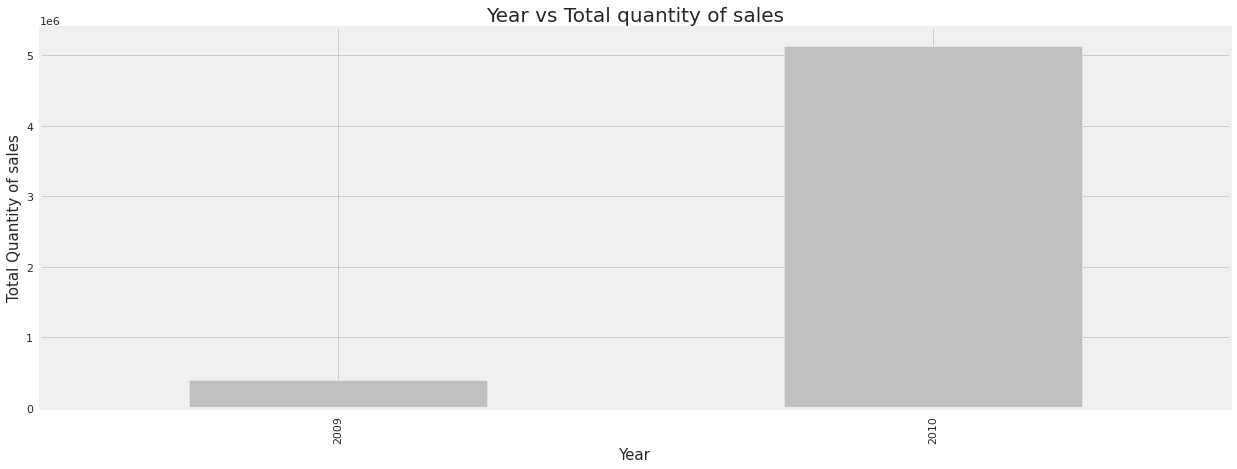

In [ ]:
cust_data.groupby('year')['quantity'].sum().plot.bar(figsize = (19, 7), color = ('silver'))
plt.title('Year vs Total quantity of sales', fontsize = 20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Total Quantity of sales', fontsize = 15)
plt.show()

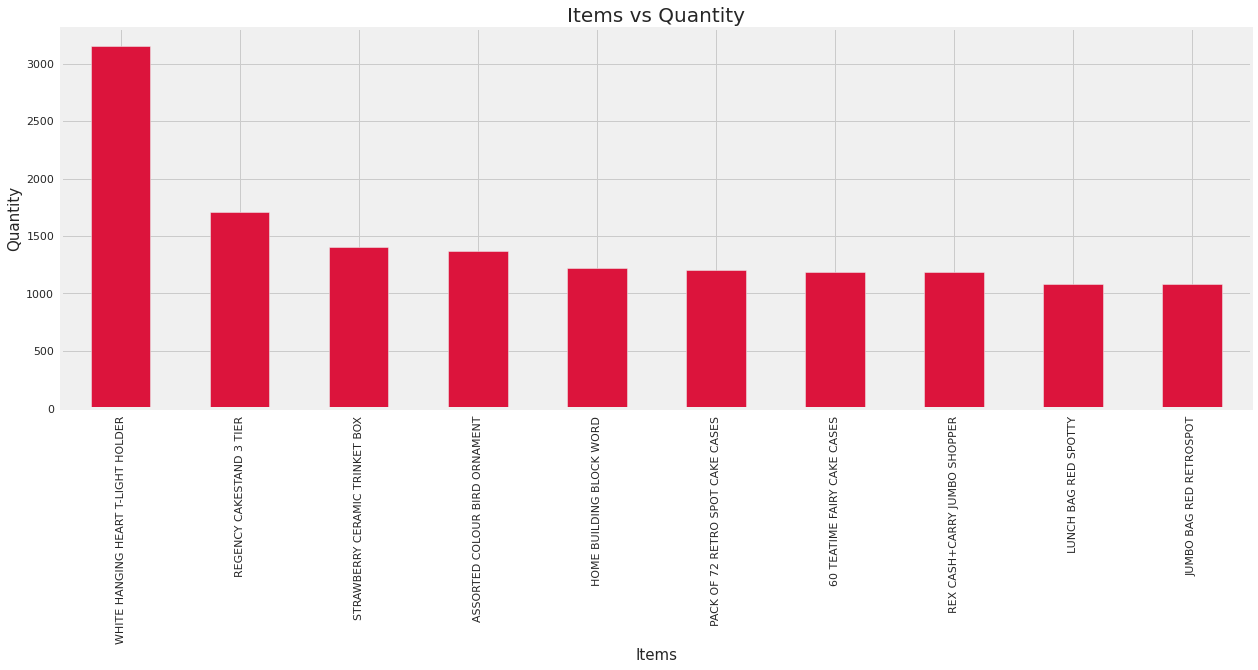

In [ ]:
#Top 10 items by sales
cust_data.description.value_counts()[:10].plot.bar(figsize = (19, 7), color = ('crimson'))
plt.title('Items vs Quantity', fontsize = 20)
plt.xlabel('Items', fontsize = 15)
plt.ylabel('Quantity', fontsize = 15)
plt.show()

In [66]:
cust_data

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,total_amount,year,month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,2009,12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009,12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009,12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,2009,12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,2009,12
...,...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90,2010,12
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,2010,12
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,2010,12
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50,2010,12


In [87]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.graph_objs as go
from plotly.offline import iplot
from operator import attrgetter
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


world_map = cust_data[['customerid', 'invoiceno', 'country']
              ].groupby(['customerid', 'invoiceno', 'country']
                       ).count().reset_index(drop = False)
countries = world_map['country'].value_counts()
data = dict(type='choropleth',
            locations = countries.index,
            locationmode = 'country names',
            z = countries,
            text = countries.index,
            colorbar = {'title':'Orders'},
            colorscale='Viridis',
            reversescale = False)

layout = dict(title={'text': "Number of Orders by Countries",
                     'y':0.9,
                     'x':0.5,
                     'xanchor': 'center',
                     'yanchor': 'top'},
              geo = dict(resolution = 50,
                         showocean = True,
                         oceancolor = "LightBlue",
                         showland = True,
                         landcolor = "silver",
                         showframe = True),
             template = 'plotly_white',
             height = 600,
             width = 1000)

choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate = False)

In [ ]:
cust_df = cust_data
create_report(cust_data)

Output hidden; open in https://colab.research.google.com to view.

##RFM Analysis

In [ ]:
cust_df.invoicedate = pd.to_datetime(cust_df.invoicedate)
recent_date = cust_df.invoicedate.max()
recent_date 

Timestamp('2010-12-09 20:01:00')

In [ ]:
rfm_df = cust_df.groupby("customerid").agg({"invoicedate": lambda values: (recent_date - values.max()).days,"invoiceno" : lambda values: len(values),"total_amount": lambda values: np.sum(values)})
rfm_df.columns = ["recency", "frequency", "monetary"]

In [ ]:
quantiles = np.arange(1, 6) * 20
quantiles
rfm_df["r_score"] = np.digitize(rfm_df.recency, bins = np.percentile(rfm_df.recency, quantiles)
                           , right=True)

rfm_df["m_score"] = np.digitize(rfm_df.monetary, bins = np.percentile(rfm_df.monetary, quantiles)
                           , right=True)

rfm_df["f_score"] = np.digitize(rfm_df.frequency, bins = np.percentile(rfm_df.frequency, quantiles)
                           , right=True)

rfm_df["r_score"] = 4 - rfm_df["r_score"]

rfm_df["r_score"] = rfm_df["r_score"] + 1
rfm_df["f_score"] = rfm_df["f_score"] + 1
rfm_df["m_score"] = rfm_df["m_score"] + 1

rfm_df.sample(10, random_state=123)

,recency,frequency,monetary,r_score,m_score,f_score
customerid,,,,,,
14924.0,245,21,620.96,1,3,2
18273.0,225,1,153.00,1,1,1
15681.0,14,35,1563.54,5,4,3
13676.0,174,13,243.90,2,1,1
13137.0,21,737,4062.29,4,5,5
15513.0,0,254,12992.33,5,5,5
15326.0,244,100,1388.81,1,4,4
16638.0,3,46,749.81,5,3,3
13027.0,20,60,10423.20,4,5,3


In [ ]:
rfm_df["RFM_SCORE"] = (rfm_df['r_score'].astype(str) +  rfm_df['f_score'].astype(str))

In [ ]:
customer_segmentation = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}


rfm_df['segment'] = rfm_df['RFM_SCORE'].replace(customer_segmentation, regex=True)

rfm_df[["segment", "r_score", "f_score", "m_score"]].groupby("segment").agg(["mean", "count"])

r_score         f_score         m_score      
                         mean count      mean count      mean count
segment                                                            
about_to_sleep       3.000000   344  1.514535   344  1.953488   344
at_Risk              1.611785   577  3.369151   577  3.057192   577
cant_loose           1.777778    99  5.000000    99  4.343434    99
champions            5.000000   632  4.621835   632  4.414557   632
hibernating          1.406220  1029  1.448008  1029  1.772595  1029
loyal_customers      3.560155   773  4.473480   773  4.135834   773
need_attention       3.000000   166  3.000000   166  3.078313   166
new_customers        5.000000    66  1.000000    66  1.954545    66
potential_loyalists  4.403101   516  2.577519   516  2.765504   516
promising            4.000000   112  1.000000   112  1.767857   112

In [77]:
print(' rfm_df Model Evaluation '.center(70, '='))
X = rfm_df[['r_score', 'f_score']]
labels = rfm_df['segment']
print(f'Silhouette Score: {round(silhouette_score(X, labels), 4)}')
print(f'Calinski Harabasz Score: {round(calinski_harabasz_score(X, labels), 4)}')
print(f'Davies Bouldin Score: {round(davies_bouldin_score(X, labels), 4)} \n{70*"="}')

====================== rfm_df Model Evaluation =======================
Silhouette Score: 0.4662
Calinski Harabasz Score: 4579.9845
Davies Bouldin Score: 0.6453 


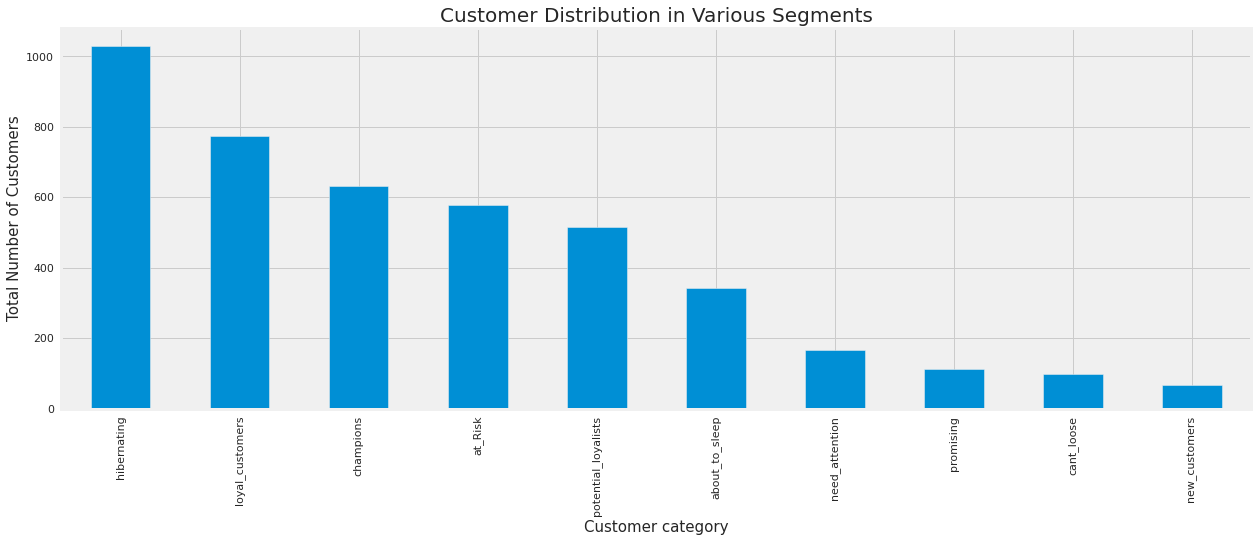

In [ ]:
rfm_df.segment.value_counts().plot.bar(figsize = (19, 7))
plt.title('Customer Distribution in Various Segments', fontsize = 20)
plt.xlabel('Customer category', fontsize = 15)
plt.ylabel('Total Number of Customers', fontsize = 15)
plt.show()

##Standazing the data

In [ ]:
scaler = preprocessing.StandardScaler()
X = rfm_df[["r_score", "f_score", "m_score"]].values
X = scaler.fit_transform(X.astype("float32"))
X



array([[-0.7189023 ,  0.01736971, -0.7070248 ],
       [ 1.3875124 ,  0.7176774 ,  0.7070248 ],
       [-0.7189023 , -0.682938  , -1.4140496 ],
       ...,
       [-1.4210405 , -1.3832458 , -0.7070248 ],
       [-0.7189023 ,  0.7176774 ,  0.7070248 ],
       [ 0.68537414,  0.7176774 ,  1.4140496 ]], dtype=float32)

MODEL DEVELOPMENT

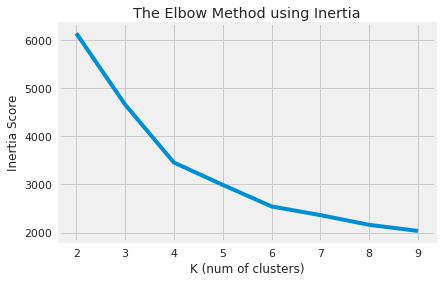

In [ ]:
inertias = {}
for clusters in range(2, 10): 
    k_clustering = cluster.KMeans(n_clusters=clusters, random_state=1)
    k_clustering.fit(X)
    inertias[clusters] = k_clustering.inertia_
    
pd.Series(inertias).plot()
plt.xlabel("K (num of clusters)")
plt.ylabel("Inertia Score")
plt.title('The Elbow Method using Inertia') 
plt.show()

From the above elbow method we see that K = 5 is the best K value for our clustering

Clustering by KMeans algorithm

In [ ]:
kmeans_model=KMeans(6)
kmeans_clusters = kmeans_model.fit_predict(X)

Clustering by Agglomerative Clustering

In [ ]:
agglo_model = AgglomerativeClustering(linkage="ward",n_clusters=6)
agglomerative_clusters = agglo_model.fit_predict(X)

GaussianMixture Model based clustering

In [ ]:
GaussianMixture_model = GaussianMixture(n_components=6)
gmm_clusters = GaussianMixture_model.fit_predict(X)

BIRCH Clustering

In [ ]:
birch_clustering = Birch(branching_factor = 60, n_clusters = 6, threshold = 1.5)  
birch_clusters = birch_clustering.fit_predict(X)


**Validating model based on Silhouette Score**


"Objects with a high silhouette value are considered well clustered" 


Source:Wikipedia



In [ ]:
def silhouette_method(df,algo,y_pred):
  print('=================================================================================')
  print('Clustering ',algo," : silhouette score : ",silhouette_score(df,y_pred))  

silhouette_method(X,' : KMeans',kmeans_clusters)
silhouette_method(X,' : Agglomerative',agglomerative_clusters)
silhouette_method(X,' : GaussianMixture',gmm_clusters)
silhouette_method(X,' : BIRCH Clustering',birch_clusters )


Clustering   : KMeans  : silhouette score :  0.3687703
Clustering   : Agglomerative  : silhouette score :  0.3183827
Clustering   : GaussianMixture  : silhouette score :  0.13879864
Clustering   : BIRCH Clustering  : silhouette score :  0.44003236


# **Model improvement**

Performance score is measured by removing outliers

In [ ]:
df_rfm = cust_df.groupby("customerid").agg({
    "invoicedate": lambda values: (recent_date - values.max()).days,
    "invoiceno" : lambda values: len(values),
    "total_amount": lambda values: np.sum(values)
})
df_rfm.columns = ["recency", "frequency", "monetary"]
df_rfm.head()


print('before removal',len(df_rfm))


df_rfm = df_rfm[df_rfm['monetary'] < 15000]

print('after removal',len(df_rfm))

quantiles = np.arange(1, 6) * 20
quantiles
df_rfm["r_score"] = np.digitize(df_rfm.recency, bins = np.percentile(df_rfm.recency, quantiles)
                           , right=True)

df_rfm["m_score"] = np.digitize(df_rfm.monetary, bins = np.percentile(df_rfm.monetary, quantiles)
                           , right=True)

df_rfm["f_score"] = np.digitize(df_rfm.frequency, bins = np.percentile(df_rfm.frequency, quantiles)
                           , right=True)

df_rfm["r_score"] = 4 - df_rfm["r_score"]

df_rfm["r_score"] = df_rfm["r_score"] + 1
df_rfm["f_score"] = df_rfm["f_score"] + 1
df_rfm["m_score"] = df_rfm["m_score"] + 1

df_rfm.sample(10, random_state=123)

scaler = preprocessing.StandardScaler()
X = df_rfm[["r_score", "f_score", "m_score"]].values
X = scaler.fit_transform(X.astype("float32"))


for clusters in range(2,11): 
  print('Number of clusters',clusters)
  kmeans_model=KMeans(clusters)
  kmeans_clusters = kmeans_model.fit_predict(X)

  agglo_model = AgglomerativeClustering(linkage="ward",n_clusters= clusters)
  agglomerative_clusters = agglo_model.fit_predict(X)


  GaussianMixture_model = GaussianMixture(n_components= clusters)
  gmm_clusters = GaussianMixture_model.fit_predict(X)

  birch = Birch(branching_factor = 60, n_clusters = clusters, threshold = 1.5)  
  birch_clusters = birch.fit_predict(X)

  silhouette_method(X,' : KMeans',kmeans_clusters)
  silhouette_method(X,' : Agglomerative',agglomerative_clusters)
  silhouette_method(X,' : GaussianMixture',gmm_clusters)
  silhouette_method(X,' : BIRCH Clustering',birch_clusters )
  print('\n')

before removal 4314
after removal 4250
Number of clusters 2
Clustering   : KMeans  : silhouette score :  0.43634748
Clustering   : Agglomerative  : silhouette score :  0.3896091
Clustering   : GaussianMixture  : silhouette score :  0.39187947
Clustering   : BIRCH Clustering  : silhouette score :  0.43634748


Number of clusters 3
Clustering   : KMeans  : silhouette score :  0.3800037
Clustering   : Agglomerative  : silhouette score :  0.33574414
Clustering   : GaussianMixture  : silhouette score :  0.33682334
Clustering   : BIRCH Clustering  : silhouette score :  0.43634748


Number of clusters 4
Clustering   : KMeans  : silhouette score :  0.38312975
Clustering   : Agglomerative  : silhouette score :  0.3453698
Clustering   : GaussianMixture  : silhouette score :  0.34038597
Clustering   : BIRCH Clustering  : silhouette score :  0.43634748


Number of clusters 5
Clustering   : KMeans  : silhouette score :  0.35751808
Clustering   : Agglomerative  : silhouette score :  0.3385108
Cluste

Performance is evaluated for different number of clusters

In [ ]:
df_rfm = cust_data.groupby("customerid").agg({
    "invoicedate": lambda values: (recent_date - values.max()).days,
    "invoiceno" : lambda values: len(values),
    "total_amount": lambda values: np.sum(values)
})
df_rfm.columns = ["recency", "frequency", "monetary"]
df_rfm.head()




quantiles = np.arange(1, 6) * 20
quantiles
df_rfm["r_score"] = np.digitize(df_rfm.recency, bins = np.percentile(df_rfm.recency, quantiles)
                           , right=True)

df_rfm["m_score"] = np.digitize(df_rfm.monetary, bins = np.percentile(df_rfm.monetary, quantiles)
                           , right=True)

df_rfm["f_score"] = np.digitize(df_rfm.frequency, bins = np.percentile(df_rfm.frequency, quantiles)
                           , right=True)

df_rfm["r_score"] = 4 - df_rfm["r_score"]

df_rfm["r_score"] = df_rfm["r_score"] + 1
df_rfm["f_score"] = df_rfm["f_score"] + 1
df_rfm["m_score"] = df_rfm["m_score"] + 1

df_rfm.sample(10, random_state=123)

scaler = preprocessing.StandardScaler()
X = df_rfm[["r_score", "f_score", "m_score"]].values
X = scaler.fit_transform(X.astype("float32"))

for clusters in range(2,11): 
  print('Number of clusters',clusters)
  kmeans_model=KMeans(clusters)
  kmeans_clusters = kmeans_model.fit_predict(X)

  agglo_model = AgglomerativeClustering(linkage="ward",n_clusters= clusters)
  agglomerative_clusters = agglo_model.fit_predict(X)

  birch_model = Birch(branching_factor = 50, n_clusters = clusters, threshold = 1.5)  
  birch_clusters = birch_model.fit_predict(X)



  GaussianMixture_model = GaussianMixture(n_components= clusters)
  gmm_clusters = GaussianMixture_model.fit_predict(X)
  silhouette_method(X,' : KMeans',kmeans_clusters)
  silhouette_method(X,' : Agglomerative',agglomerative_clusters)
  silhouette_method(X,' : GaussianMixture',gmm_clusters)
  silhouette_method(X,' : BIRCH Clustering',birch_clusters )
  print('\n')

Number of clusters 2
Clustering   : KMeans  : silhouette score :  0.44003236
Clustering   : Agglomerative  : silhouette score :  0.38857546
Clustering   : GaussianMixture  : silhouette score :  0.41893008
Clustering   : BIRCH Clustering  : silhouette score :  0.44003236


Number of clusters 3
Clustering   : KMeans  : silhouette score :  0.37477517
Clustering   : Agglomerative  : silhouette score :  0.3198666
Clustering   : GaussianMixture  : silhouette score :  0.34350798
Clustering   : BIRCH Clustering  : silhouette score :  0.44003236


Number of clusters 4
Clustering   : KMeans  : silhouette score :  0.38751876
Clustering   : Agglomerative  : silhouette score :  0.32727057
Clustering   : GaussianMixture  : silhouette score :  0.343267
Clustering   : BIRCH Clustering  : silhouette score :  0.44003236


Number of clusters 5
Clustering   : KMeans  : silhouette score :  0.3709601
Clustering   : Agglomerative  : silhouette score :  0.30900335
Clustering   : GaussianMixture  : silhouette 

From the above analysis,we saw that "K-Means" algorithm has high silhouette score as compared to others. So we'll apply K-Means algorithm for our model.

Text(0, 0.5, 'Inertia')

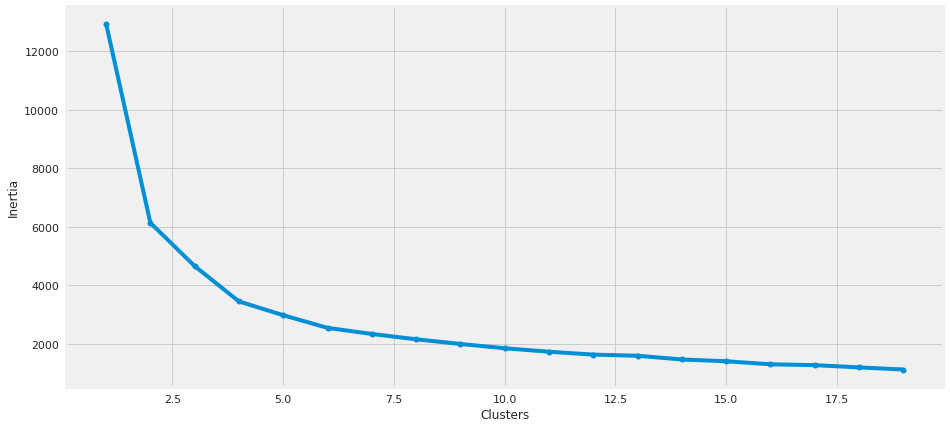

In [ ]:
method = 'k-means++'
sum_of_square_error = []
for cluster in range(1,20):
    kmeans_model=KMeans(clusters)
    k_clustering = KMeans(n_clusters = cluster, init= method)
    k_clustering.fit(X)
    sum_of_square_error.append(k_clustering.inertia_)

sse = pd.DataFrame({'no_of_cluster':range(1,20), 'Sum_of_squared_error': sum_of_square_error})
plt.figure(figsize=(14,7))
plt.plot(sse['no_of_cluster'], sse['Sum_of_squared_error'], marker='o')
plt.xlabel('Clusters')
plt.ylabel('Inertia')

In [78]:
rfm_df.to_csv('/content/drive/MyDrive/Projects/Data Analytics/CRM Analytics/customer_segmentation.csv',index=False)

#Cohorant Analysis

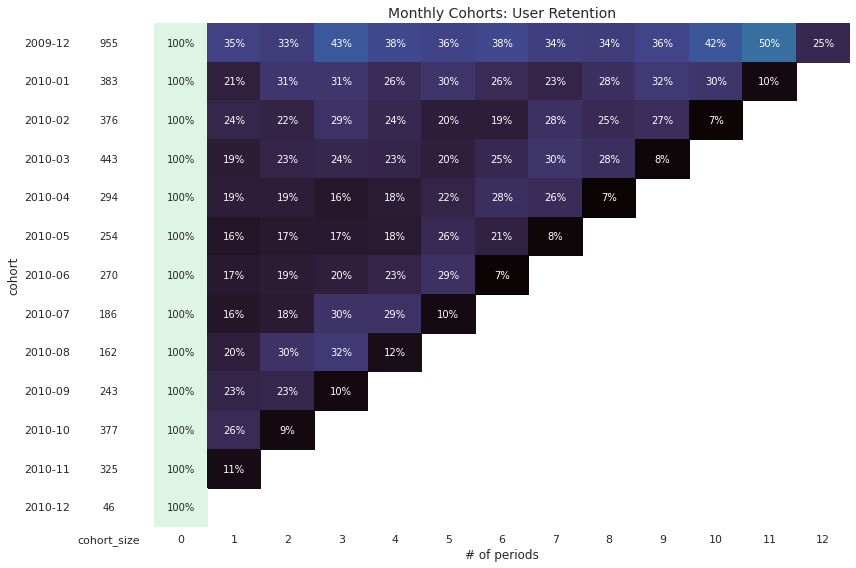

In [91]:
def CohortAnalysis(customer_data):
  cus_df = customer_data.copy()
  cus_df['invoicedate'] = pd.to_datetime(cus_df['invoicedate'])
  cus_df = cus_df[['customerid', 'invoiceno', 'invoicedate']].drop_duplicates()
  cus_df['order_month'] = cus_df['invoicedate'].dt.to_period('M')
  cus_df['cohort'] = cus_df.groupby('customerid')['invoicedate'].transform('min').dt.to_period('M')
  cohort_cus_df = cus_df.groupby(['cohort', 'order_month']).agg(n_customers=('customerid', 'nunique')).reset_index(drop=False)
  cohort_cus_df['period_number'] = (cohort_cus_df.order_month - cohort_cus_df.cohort).apply(attrgetter('n'))
  cohort_pivot = cohort_cus_df.pivot_table(index = 'cohort',
                                          columns = 'period_number',
                                          values = 'n_customers')
  cohort_size = cohort_pivot.iloc[:,0]
  retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)
  with sns.axes_style("white"):
      fig, ax = plt.subplots(1, 2, figsize=(12, 8),
                      sharey=True,
                      gridspec_kw={'width_ratios': [1, 11]})
      sns.heatmap(retention_matrix, 
                  mask=retention_matrix.isnull(), 
                  annot=True,
                  cbar = False,
                  fmt='.0%', 
                  cmap='mako', ax=ax[1])
      ax[1].set_title('Monthly Cohorts: User Retention', fontsize=14)
      ax[1].set(xlabel='# of periods',
                ylabel='')
      white_cmap = mcolors.ListedColormap(['white'])
      sns.heatmap(pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'}), 
                  annot=True, 
                  cbar = False,
                  fmt='g',
                  cmap=white_cmap,
                  ax=ax[0])
      fig.tight_layout()
    
CohortAnalysis(cust_df)

MARKET BASKET ANALYSIS


In [56]:
dt.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [60]:
#Reading dataset for market basket analysis
dt=pd.read_csv('/content/drive/MyDrive/Projects/Data Analytics/CRM Analytics/Year 2009-2010.csv',encoding= 'unicode_escape')

#Extracting item name from description column
dt.Description=dt.Description.str.strip()

dt.columns = dt.columns.str.lower()

#renaming column
dt.rename(columns={'customer id':'customerid','invoice':'invoiceno','price':'unitprice'}, inplace=True)

#filtering orders with invoice number
dt.dropna(axis=0, subset=['invoiceno'], inplace=True)



#converting invoice column into string
dt['invoiceno'] = dt['invoiceno'].astype('str')

dt_1 =dt.copy()

#filtering cancelled orders
dt_1  = dt_1 [~dt_1['invoiceno'].str.contains('C')]


#Converting column names to lowercase
cust_data.columns = cust_data.columns.str.lower()




data = dt_1[dt_1.country=='France'].groupby(['invoiceno', 'description'])['quantity'].sum()

data=data.unstack().reset_index().fillna('0')

#resetting index
data.set_index('invoiceno')

data.columns=data.columns.str.replace(' ','_')

In [61]:
for cl in data.columns:
    data[cl]=data[cl].astype(int)

In [62]:
def onehot(item):
    if item <= 0:
        return 0
    if item >= 1:
        return 1
dataset=data.applymap(onehot)


In [63]:
dataset=dataset.set_index('invoiceno')

In [64]:
freq_items = apriori(dataset, min_support=0.1, use_colnames=True)

In [65]:
rules = association_rules(freq_items, metric="lift", min_threshold=1.5)
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,"(POSTAGE, LUNCH_BOX_WITH_CUTLERY_RETROSPOT)",(STRAWBERRY_LUNCH_BOX_WITH_CUTLERY),0.149378,0.149378,0.103734,0.694444,4.648920,0.081421,2.783855
4,(STRAWBERRY_LUNCH_BOX_WITH_CUTLERY),"(POSTAGE, LUNCH_BOX_WITH_CUTLERY_RETROSPOT)",0.149378,0.149378,0.103734,0.694444,4.648920,0.081421,2.783855
2,"(STRAWBERRY_LUNCH_BOX_WITH_CUTLERY, POSTAGE)",(LUNCH_BOX_WITH_CUTLERY_RETROSPOT),0.128631,0.174274,0.103734,0.806452,4.627496,0.081317,4.266252
5,(LUNCH_BOX_WITH_CUTLERY_RETROSPOT),"(STRAWBERRY_LUNCH_BOX_WITH_CUTLERY, POSTAGE)",0.174274,0.128631,0.103734,0.595238,4.627496,0.081317,2.152795
1,(LUNCH_BOX_WITH_CUTLERY_RETROSPOT),(STRAWBERRY_LUNCH_BOX_WITH_CUTLERY),0.174274,0.149378,0.120332,0.690476,4.622354,0.094299,2.748165
0,(STRAWBERRY_LUNCH_BOX_WITH_CUTLERY),(LUNCH_BOX_WITH_CUTLERY_RETROSPOT),0.149378,0.174274,0.120332,0.805556,4.622354,0.094299,4.246592
